In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [107]:
q1_path = "data/mr-art_q1_incomplete/fsqc-results.csv"
q2_path = "data/mr-art_q2_incomplete/fsqc-results.csv"
q3_path = "data/mr-art_q3_incomplete/fsqc-results.csv"

In [108]:
q1_df = pd.read_csv(q1_path)
q2_df = pd.read_csv(q2_path)
q3_df = pd.read_csv(q3_path)

q1_df["QA"] = np.repeat(["EXC"], (q1_df.shape[0]))
q2_df["QA"] = np.repeat(["MED"], (q2_df.shape[0]))
q3_df["QA"] = np.repeat(["BAD"], (q3_df.shape[0]))

# q1_df["QA"] = np.repeat([1], (q1_df.shape[0]))
# q2_df["QA"] = np.repeat([0], (q2_df.shape[0]))
# q3_df["QA"] = np.repeat([-1], (q3_df.shape[0]))

In [109]:
df = pd.concat([q1_df, q2_df, q3_df])
df["QA"] = df["QA"].astype("category").cat.codes
df.describe()

,wm_snr_orig,gm_snr_orig,wm_snr_norm,gm_snr_norm,cc_size,holes_lh,holes_rh,defects_lh,defects_rh,topo_lh,topo_rh,con_snr_lh,con_snr_rh,rot_tal_x,rot_tal_y,rot_tal_z,QA
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,10.777442,5.946304,17.733334,6.127469,0.003207,25.418033,22.188525,24.811475,24.500000,3.109836,6.981967,3.578754,3.534028,-0.152614,-0.003842,0.033574,0.934426
std,2.091830,1.197859,4.179027,0.277368,0.000673,32.779463,30.069433,21.857666,23.267844,5.300342,21.420516,0.384922,0.353329,0.113903,0.040146,0.044636,0.830590
min,4.626449,2.396850,7.401289,5.616120,0.001988,1.000000,1.000000,4.000000,2.000000,0.400000,0.500000,1.903509,1.802340,-0.499015,-0.088862,-0.077447,0.000000
25%,9.274526,5.119585,14.493568,5.937015,0.002631,8.000000,6.000000,11.000000,8.250000,0.800000,1.300000,3.434301,3.446548,-0.218886,-0.038051,0.000179,0.000000
50%,10.915598,6.268734,18.878266,6.103662,0.003185,14.500000,10.000000,16.000000,15.500000,1.300000,2.050000,3.660998,3.643894,-0.141572,-0.004962,0.031833,1.000000
75%,12.221011,6.822893,21.109300,6.309923,0.003626,31.000000,24.000000,32.000000,31.750000,2.675000,4.300000,3.848683,3.755745,-0.082924,0.021914,0.068803,2.000000
max,15.755179,8.026777,24.973701,7.197556,0.005519,242.000000,188.000000,108.000000,124.000000,36.500000,170.200000,4.158955,3.955687,0.095712,0.101922,0.131699,2.000000


In [110]:
df["QA"].unique()

array([1, 2, 0], dtype=int8)

## Feature description

variable       |   description
---------------|----------------------------------------------------------------
subject        |   subject ID
wm_snr_orig    |   signal-to-noise ratio for white matter in orig.mgz
gm_snr_orig    |   signal-to-noise ratio for gray matter in orig.mgz
wm_snr_norm    |   signal-to-noise ratio for white matter in norm.mgz
gm_snr_norm    |   signal-to-noise ratio for gray matter in norm.mgz
cc_size        |   relative size of the corpus callosum
lh_holes       |   number of holes in the left hemisphere
rh_holes       |   number of holes in the right hemisphere
lh_defects     |   number of defects in the left hemisphere
rh_defects     |   number of defects in the right hemisphere
topo_lh        |   topological fixing time for the left hemisphere
topo_rh        |   topological fixing time for the right hemisphere
con_lh_snr     |   wm/gm contrast signal-to-noise ratio in the left hemisphere
con_rh_snr     |   wm/gm contrast signal-to-noise ratio in the right hemisphere
rot_tal_x      |   rotation component of the Talairach transform around the x axis
rot_tal_y      |   rotation component of the Talairach transform around the y axis
rot_tal_z      |   rotation component of the Talairach transform around the z axis

## Correlation matrix

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_36259/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

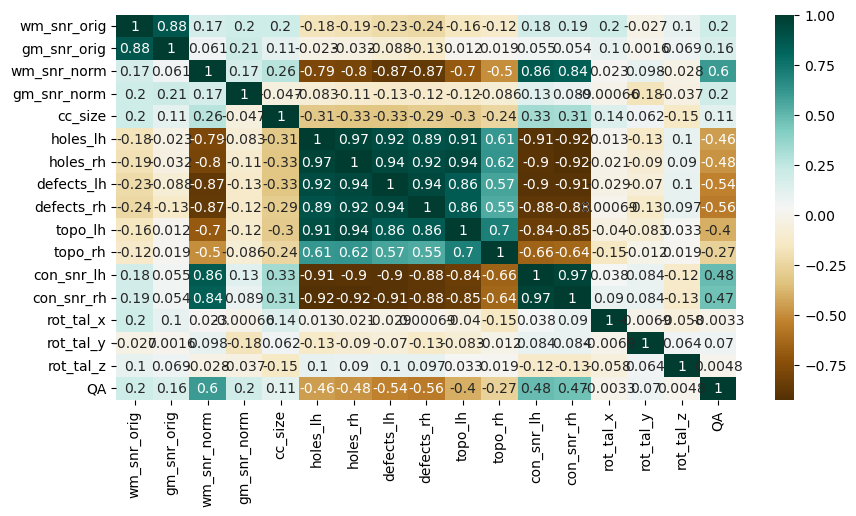

In [111]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

In [112]:
df = df.drop(["wm_snr_orig", "gm_snr_orig", "cc_size", "topo_lh", "topo_rh", "rot_tal_x", "rot_tal_y", "rot_tal_z"], axis=1)

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_36259/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

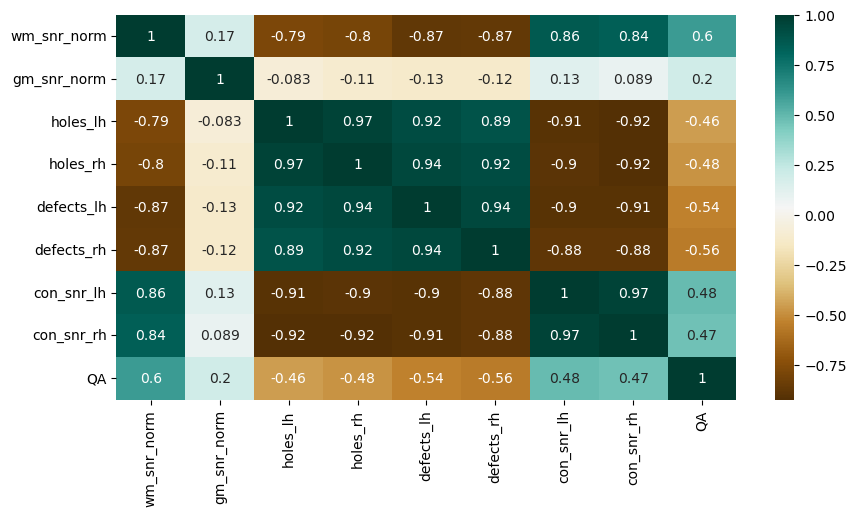

In [113]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop(["subject", "QA"], axis=1), df["QA"]

X = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scaler = StandardScaler().fit(X_train, y_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [115]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=GaussianProcessClassifier())

In [116]:
from sklearn.metrics import accuracy_score

y_pred = ovo.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
score

0.64

<Axes: >

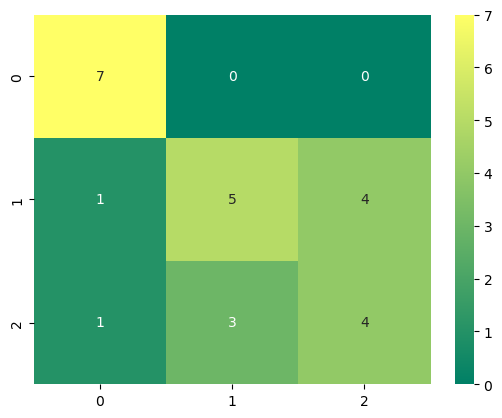

In [117]:
from sklearn.metrics import confusion_matrix  # for confusion matrix

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="summer")

The overall score for Decision Tree classifier is: 59.68


<Axes: >

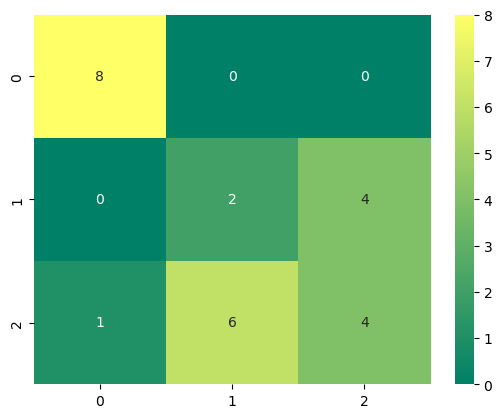

In [118]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini", min_samples_split=10, min_samples_leaf=1, max_depth=20
)
model.fit(X_train, y_train)
dt_pred = model.predict(X_test)
kfold = KFold(n_splits=10)  # k=10, split the data into 10 equal parts
result_tree = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print(
    "The overall score for Decision Tree classifier is:",
    round(result_tree.mean() * 100, 2),
)
y_pred = cross_val_predict(model, X, y, cv=10)
sns.heatmap(confusion_matrix(dt_pred, y_test), annot=True, cmap="summer")

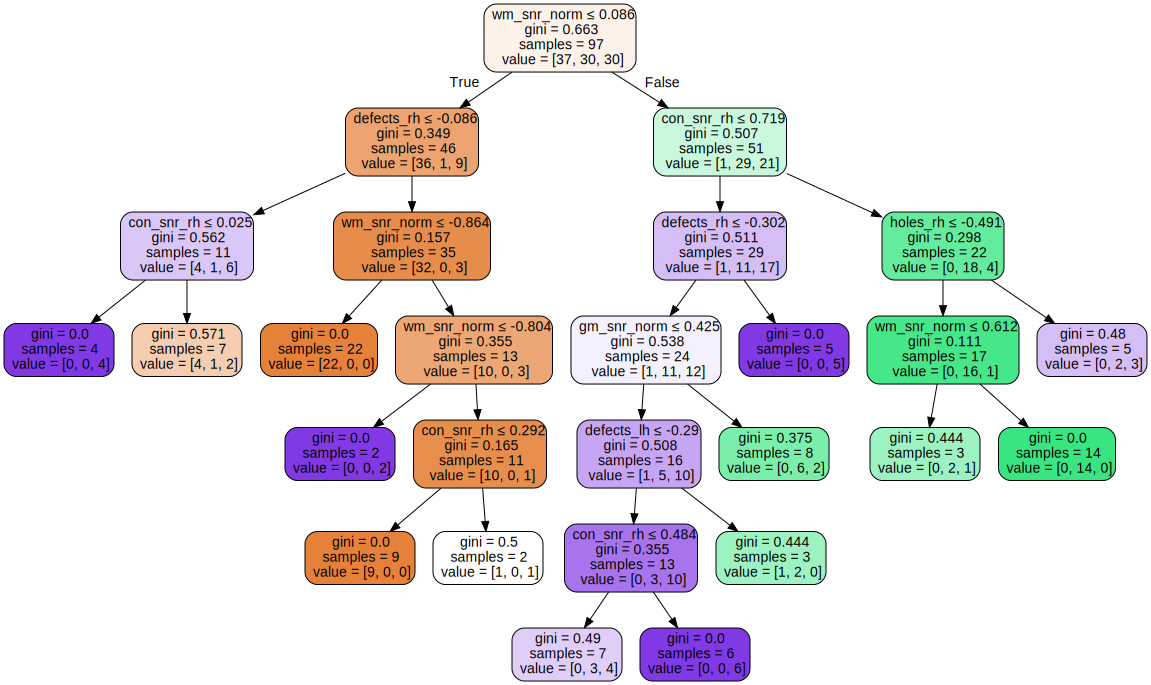

In [119]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=df.columns[1:-1],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph